# Advanced operations

## Polynomials

NumPy also contains polynomials in different bases:

For example, $3x^2 + 2x - 1$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = np.poly1d([3, 2, -1])
p(0)

np.int64(-1)

In [3]:
p.roots

array([-1.        ,  0.33333333])

In [4]:
p.order

2

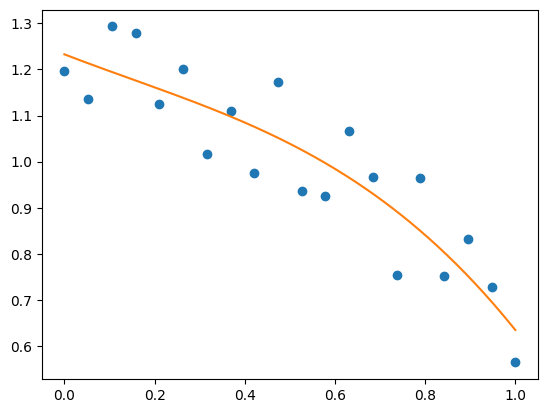

In [5]:
x = np.linspace(0, 1, 20)
rng = np.random.default_rng()
y = np.cos(x) + 0.3*rng.random(20)
p = np.poly1d(np.polyfit(x, y, 3))

t = np.linspace(0, 1, 200) # use a larger number of points for smoother plotting
plt.plot(x, y, 'o', t, p(t), '-');

See <https://numpy.org/doc/stable/reference/routines.polynomials.poly1d.html>
for more.

### More polynomials (with more bases)

NumPy also has a more sophisticated polynomial interface, which supports
e.g. the Chebyshev basis.

$3x^2 + 2x - 1$:

In [6]:
p = np.polynomial.Polynomial([-1, 2, 3]) # coefs in different order!
p(0)

np.float64(-1.0)

In [7]:
p.roots()

array([-1.        ,  0.33333333])

In [8]:
p.degree()  # In general polynomials do not always expose 'order'

2

Example using polynomials in Chebyshev basis, for polynomials in
range `[-1, 1]`:

In [9]:
x = np.linspace(-1, 1, 2000)
rng = np.random.default_rng()
y = np.cos(x) + 0.3*rng.random(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)

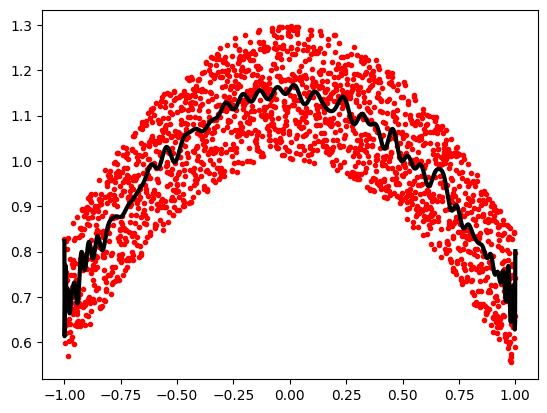

In [10]:
plt.plot(x, y, 'r.')
plt.plot(x, p(x), 'k-', lw=3)

The Chebyshev polynomials have some advantages in interpolation.

## Loading data files

### Text files

Example: {download}`populations.txt <data/populations.txt>`.

In [11]:
data = np.loadtxt('data/populations.txt')
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [12]:
np.savetxt('pop2.txt', data)
data2 = np.loadtxt('pop2.txt')

:::{note}
If you have a complicated text file, what you can try are:

- `np.genfromtxt`
- Using Python's I/O functions and e.g. regexps for parsing
  (Python is quite well suited for this)
  :::

### Reminder: Navigating the filesystem with Jupyter and IPython

Show current directory:

In [13]:
pwd

'/Users/mb312/dev_trees/scientific-python-lectures/intro/numpy'

Change to `data` subdirectory:

In [14]:
cd data

/Users/mb312/dev_trees/scientific-python-lectures/data


Show filesystem listing for current directory:

In [15]:
ls

an_array.txt          organisms.txt         waveform_1.npy
elephant.png          populations.txt       waveform_2.npy
LICENCE.txt           species.txt           women_percentage.txt
moonlanding.png       test.png
MV_HFV_012.jpg*       test.wav


Change back to containing directory.

In [16]:
cd ..

/Users/mb312/dev_trees/scientific-python-lectures


### Images

Using Matplotlib:

In [17]:
img = plt.imread('data/elephant.png')
img.shape, img.dtype

((200, 300, 3), dtype('float32'))

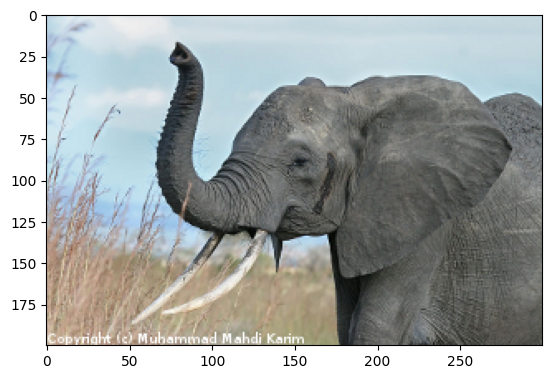

In [18]:
# Plot and save the original figure
plt.imshow(img)
plt.savefig('plot.png')

In [19]:
# Plot and save the red channel of the image.
plt.imsave('red_elephant.png', img[:,:,0], cmap=plt.cm.gray)

This saved only one channel (of RGB):

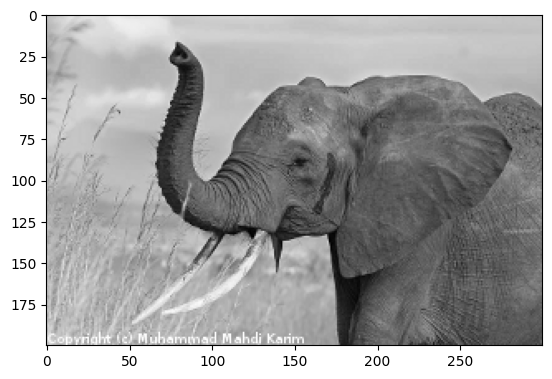

In [20]:
plt.imshow(plt.imread('red_elephant.png'))

Other libraries:

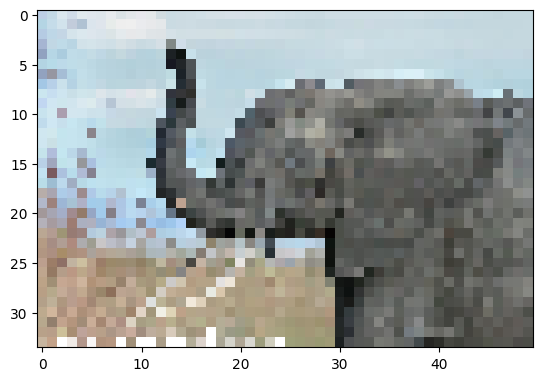

In [21]:
import imageio.v3 as iio

# Lower resolution (every sixth pixel in each dimension).
iio.imwrite('tiny_elephant.png', (img[::6,::6] * 255).astype(np.uint8))
plt.imshow(plt.imread('tiny_elephant.png'), interpolation='nearest')

### NumPy's own format

NumPy has its own binary format, not portable but with efficient I/O:

In [22]:
data = np.ones((3, 3))
np.save('pop.npy', data)
data3 = np.load('pop.npy')

### Well-known (& more obscure) file formats

- HDF5: [h5py](https://www.h5py.org/), [PyTables](https://www.pytables.org)
- NetCDF: `scipy.io.netcdf_file`, [netcdf4-python](https://code.google.com/archive/p/netcdf4-python), ...
- Matlab: `scipy.io.loadmat`, `scipy.io.savemat`
- MatrixMarket: `scipy.io.mmread`, `scipy.io.mmwrite`
- IDL: `scipy.io.readsav`

... if somebody uses it, there's probably also a Python library for it.

::: {exercise-start}
:label: npa-load-proc-ex
:class: dropdown
:::

Write code that loads data from {download}`populations.txt
<data/populations.txt>`: and drops the last column and the first 5 rows. Save
the smaller dataset to `pop2.txt`.

::: {exercise-end}
:::

::: {solution-start} npa-load-proc-ex
:class: dropdown
:::

In [23]:
data = np.loadtxt("data/populations.txt")
reduced_data = data[5:, :-1]
np.savetxt("pop2.txt", reduced_data)

::: {solution-end}
:::

<!---
loadtxt, savez, load, fromfile, tofile
-->
<!---
real life: point to HDF5, NetCDF, etc.
-->
<!---
EXE: use loadtxt to load a data file
-->
<!---
EXE: use savez and load to save data in binary format
-->
<!---
EXE: use tofile and fromfile to put and get binary data bytes in/from a file
follow-up: .view()
-->
<!---
EXE: parsing text files -- Python can do this reasonably well natively!
throw in the mix some random text file to be parsed (eg. PPM)
-->
<!---
EXE: advanced: read the data in a PPM file
-->

:::{admonition} NumPy internals
If you are interested in the NumPy internals, there is a good discussion in
{ref}`advanced-numpy`.
:::